In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pl.scan_csv('goodreads_dataset/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')
pd_df = pd.read_csv('goodreads_dataset/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')

In [4]:
df.collect().sample(5)

source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
str,i64,str,str,str,f64,str,str,i64,str,str,str,str,f64,str
"""https://www.goodreads.com/book…",2616,"""Nonfiction""","""The Good Life: Lessons from th…","""Robert Waldinger|Marc Schulz""",4.17,"""5,471""","""640""",352,"""Hardcover""","""Alternate cover edition of ISB…","""10-Jan-23""","""Kindle $14.99""",14.99,"""Robert J. Waldinger (born 1951…"
"""https://www.goodreads.com/book…",15783,"""Horror""","""My Darling Girl""","""Jennifer McMahon""",3.81,"""7,286""","""1,386""",320,"""Hardcover""","""A spine-tingling psychological…","""3-Oct-23""","""Kindle $14.99""",14.99,"""I'm the author of nine suspens…"
"""https://www.goodreads.com/book…",17535,"""Nonfiction""","""On Our Best Behavior: The Seve…","""Elise Loehnen""",3.91,"""3,334""","""483""",384,"""Hardcover""","""A groundbreaking exploration o…","""23-May-23""","""Kindle $13.99""",13.99,null
"""https://www.goodreads.com/book…",15123,"""Science Fiction""","""The Future""","""Naomi Alderman""",3.88,"""3,780""","""995""",432,"""Hardcover""","""From the award-winning, bestse…","""7-Nov-23""","""Kindle $14.99""",14.99,"""Naomi Alderman (born 1974 in L…"
"""https://www.goodreads.com/book…",16108,"""Nonfiction""","""Outlive: The Science and Art o…","""Peter Attia|Bill Gifford""",4.42,"""28,257""","""2,555""",496,"""Hardcover""","""#1 NEW YORK TIMES BESTSELLER •…","""28-Mar-23""","""Kindle $13.99""",13.99,"""Peter Attia (born 19 March 197…"


In [5]:
# pd_df.info()

print(df.schema)
# pd_df.drop(['source_URL', 'Book Description', 'About the Author'], axis=1, inplace=True)
df = df.drop(['source_URL', 'Book Description', 'About the Author'])

Schema([('source_URL', String), ('Readers Choice Votes', Int64), ('Readers Choice Category', String), ('Title', String), ('Author', String), ('Total Avg Rating', Float64), ('Number of Ratings', String), ('Number of Reviews', String), ('Number of Pages', Int64), ('Edition', String), ('Book Description', String), ('First Published date', String), ('Kindle Version and Price', String), ('Kindle Price', Float64), ('About the Author', String)])


In [6]:
numeric_columns = ['Number of Ratings','Number of Reviews']

#for column in numeric_columns:
    # pd_df[column] = pd_df[column].str.replace(',', '', regex=True).astype('int32')

# Remove the character comma from those columns and convert to Int32
new_cols = [
    pl.col(column).str.replace(',', '').cast(pl.Int32).alias(column)
    for column in numeric_columns]
df = df.with_columns(new_cols)

df.collect() # we indicate a collect to see the changes




Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price
i64,str,str,str,f64,i32,i32,i64,str,str,str,f64
200722,"""Fiction""","""Yellowface""","""R.F. Kuang""",3.87,252189,37032,336,"""Hardcover""","""25-May-23""","""Kindle $14.99""",14.99
60171,"""Fiction""","""Hello Beautiful""","""Ann Napolitano""",4.2,200304,19288,416,"""Kindle Edition""","""14-Mar-23""","""Kindle $2.99""",2.99
57702,"""Fiction""","""The Wishing Game""","""Meg Shaffer""",4.19,62142,10594,304,"""Hardcover""","""30-May-23""","""Kindle $2.99""",2.99
53470,"""Fiction""","""Tom Lake""","""Ann Patchett""",4.13,127318,16108,309,"""Hardcover""","""1-Aug-23""","""Kindle $15.99""",15.99
45859,"""Fiction""","""The Five-Star Weekend""","""Elin Hilderbrand""",4.11,116619,8141,384,"""Hardcover""","""13-Jun-23""","""Kindle $14.99""",14.99
…,…,…,…,…,…,…,…,…,…,…,…
2533,"""Humor""","""Misfit: Growing Up Awkward in …","""Gary Gulman""",4.23,981,155,304,"""Hardcover""","""19-Sep-23""","""Kindle $14.99""",14.99
2257,"""Humor""","""Unreliable Narrator: Me, Mysel…","""Aparna Nancherla""",3.71,517,71,304,"""Hardcover""","""19-Sep-23""","""Kindle $14.99""",14.99
1866,"""Humor""","""America the Beautiful?: One Wo…","""Blythe Roberson""",3.83,1200,247,304,"""Paperback""","""18-Apr-23""","""Kindle $9.99""",9.99


In [7]:
# pd_df['Kindle Version'] = df['Kindle Version and Price'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
# pd_df['Kindle Version'] = df['Kindle Version'].astype('category')

df = df.with_columns(pl.col('Kindle Version and Price')
    .str.extract('([a-zA-Z ]+)')
    .str.strip_chars()
    .cast(pl.Categorical)
    .alias('Kindle Version'))
df = df.collect()  # we indicate a collect to see the changes

In [7]:
# Find the number of missing values for each column
df.isnull().sum()

Readers Choice Votes        0
Readers Choice Category     0
Title                       0
Author                      0
Total Avg Rating            0
Number of Ratings           0
Number of Reviews           0
Number of Pages             0
Edition                     0
First Published date        0
Kindle Version and Price    0
Kindle Price                0
Kindle Version              0
dtype: int64

In [8]:
df.sample(5)

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
147,15389,Horror,Silver Nitrate,Silvia Moreno-Garcia,3.65,13743,3220,323,Hardcover,18-Jul-23,Kindle $1.99,1.99,Kindle
244,18179,Memoir & Autobiography,All My Knotted-Up Life: A Memoir,Beth Moore,4.50,27822,3918,293,Hardcover,21-Feb-23,Kindle $16.99,16.99,Kindle
2,57702,Fiction,The Wishing Game,Meg Shaffer,4.19,62142,10594,304,Hardcover,30-May-23,Kindle $2.99,2.99,Kindle
140,77993,Horror,Holly,Stephen King,4.19,54849,6818,449,Hardcover,5-Sep-23,Kindle $14.99,14.99,Kindle
127,17140,Science Fiction,The Ferryman,Justin Cronin,3.95,22361,3448,538,Hardcover,2-May-23,Kindle $13.99,13.99,Kindle


In [9]:
cat_counts = df['Readers Choice Category'].value_counts()
print(cat_counts)

Readers Choice Category
Fiction                                  20
Historical Fiction                       20
Mystery & Thriller                       20
Romance                                  20
Romantasy                                20
Fantasy                                  20
Science Fiction                          20
Horror                                   20
Young Adult Fantasy & Science Fiction    20
Young Adult Fiction                      20
Nonfiction                               20
Memoir & Autobiography                   20
History & Biography                      20
Humor                                    20
Debut Novel                              19
Name: count, dtype: int64


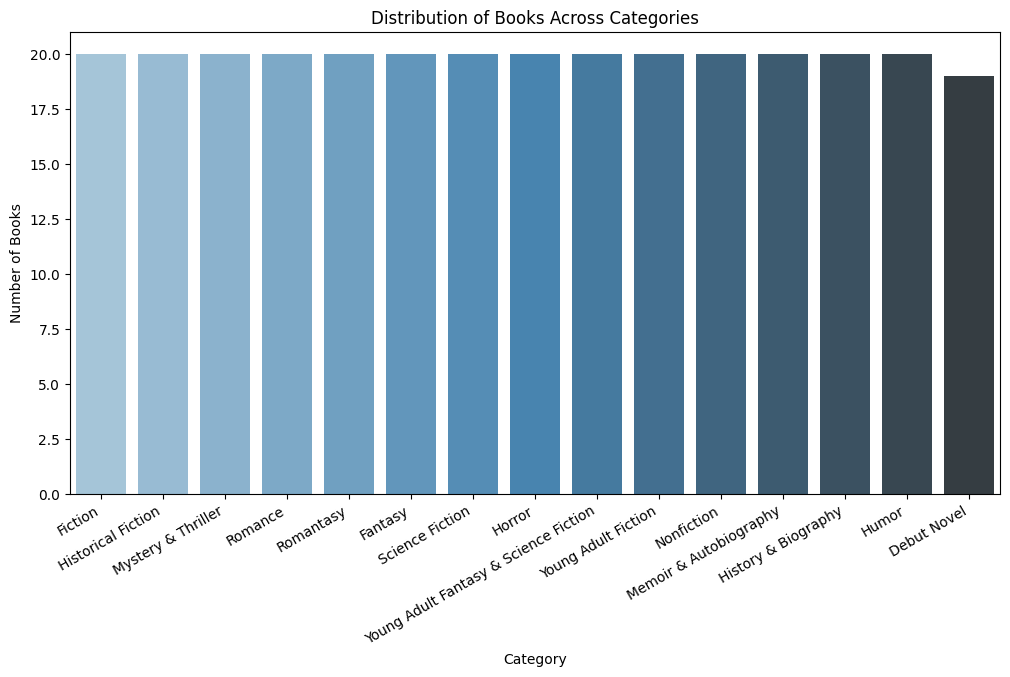

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette='Blues_d')
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')
plt.show()

In [11]:
# Determine which column we want to aggregate
aggregations = {
    'Readers Choice Votes': 'sum', 
    'Total Avg Rating': 'mean',
    'Number of Ratings': 'sum',
    'Number of Reviews': 'sum',
    'Number of Pages': 'median',
    'Kindle Price': 'median',
}

# Group by book category
category_vote = df.groupby('Readers Choice Category').agg(aggregations).sort_values('Readers Choice Votes', ascending=False)

# Create new DataFrame of Votes, Ratings, and Reviews
result_df = pd.DataFrame({
    'Avg Ratings': category_vote['Total Avg Rating'].round(2),
    'Number of Ratings': category_vote['Number of Ratings'],
    'Number of Reviews': category_vote['Number of Reviews'],
    'Median Pages': category_vote['Number of Pages'],
    'Median Kindle Price': category_vote['Kindle Price'].round(2)
})

result_df

,Avg Ratings,Number of Ratings,Number of Reviews,Median Pages,Median Kindle Price
Readers Choice Category,,,,,
Romance,4.06,2737676,336747,398.0,6.99
Fiction,3.95,1288841,157445,328.0,14.99
Romantasy,4.07,1387830,203928,506.0,5.49
Mystery & Thriller,4.05,1673792,181312,365.5,14.99
Fantasy,4.10,523942,93625,407.5,14.73
Young Adult Fantasy & Science Fiction,4.04,543467,113098,440.0,10.99
Historical Fiction,4.14,692953,79846,368.0,12.99
Memoir & Autobiography,4.18,814014,99369,298.5,14.99
Young Adult Fiction,3.97,392355,73957,384.0,10.99


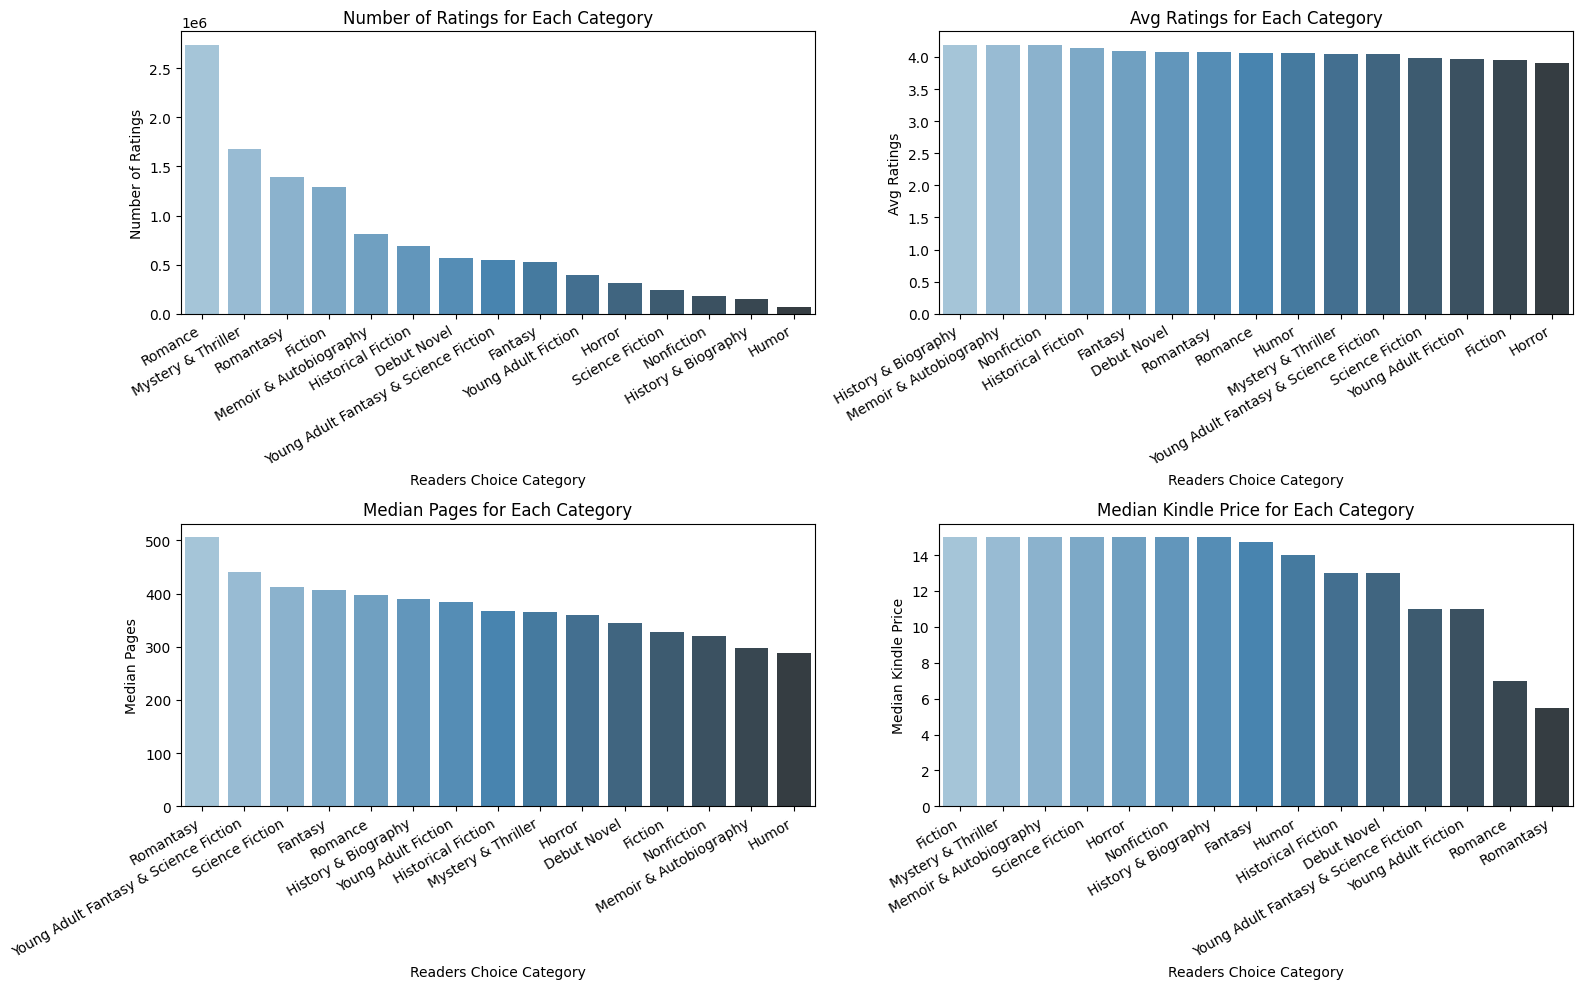

In [23]:
# figsize is (width, height) in inches
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)

layout = {
    'Number of Ratings': (0, 0),
    'Avg Ratings': (0, 1),
    'Median Pages': (1, 0),
    'Median Kindle Price': (1, 1),
}

for column, (i, j) in layout.items():
    ax = axes[i, j]
    result_df_sorted = result_df.sort_values(by=column, ascending=False)
    sns.barplot(x=result_df_sorted.index, y=result_df_sorted[column], palette='Blues_d', order=result_df_sorted.index, ax=ax)
    ax.set_title(f'{column} for Each Category')
    ax.set_ylabel(column)
    ax.set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

plt.tight_layout()
plt.show()

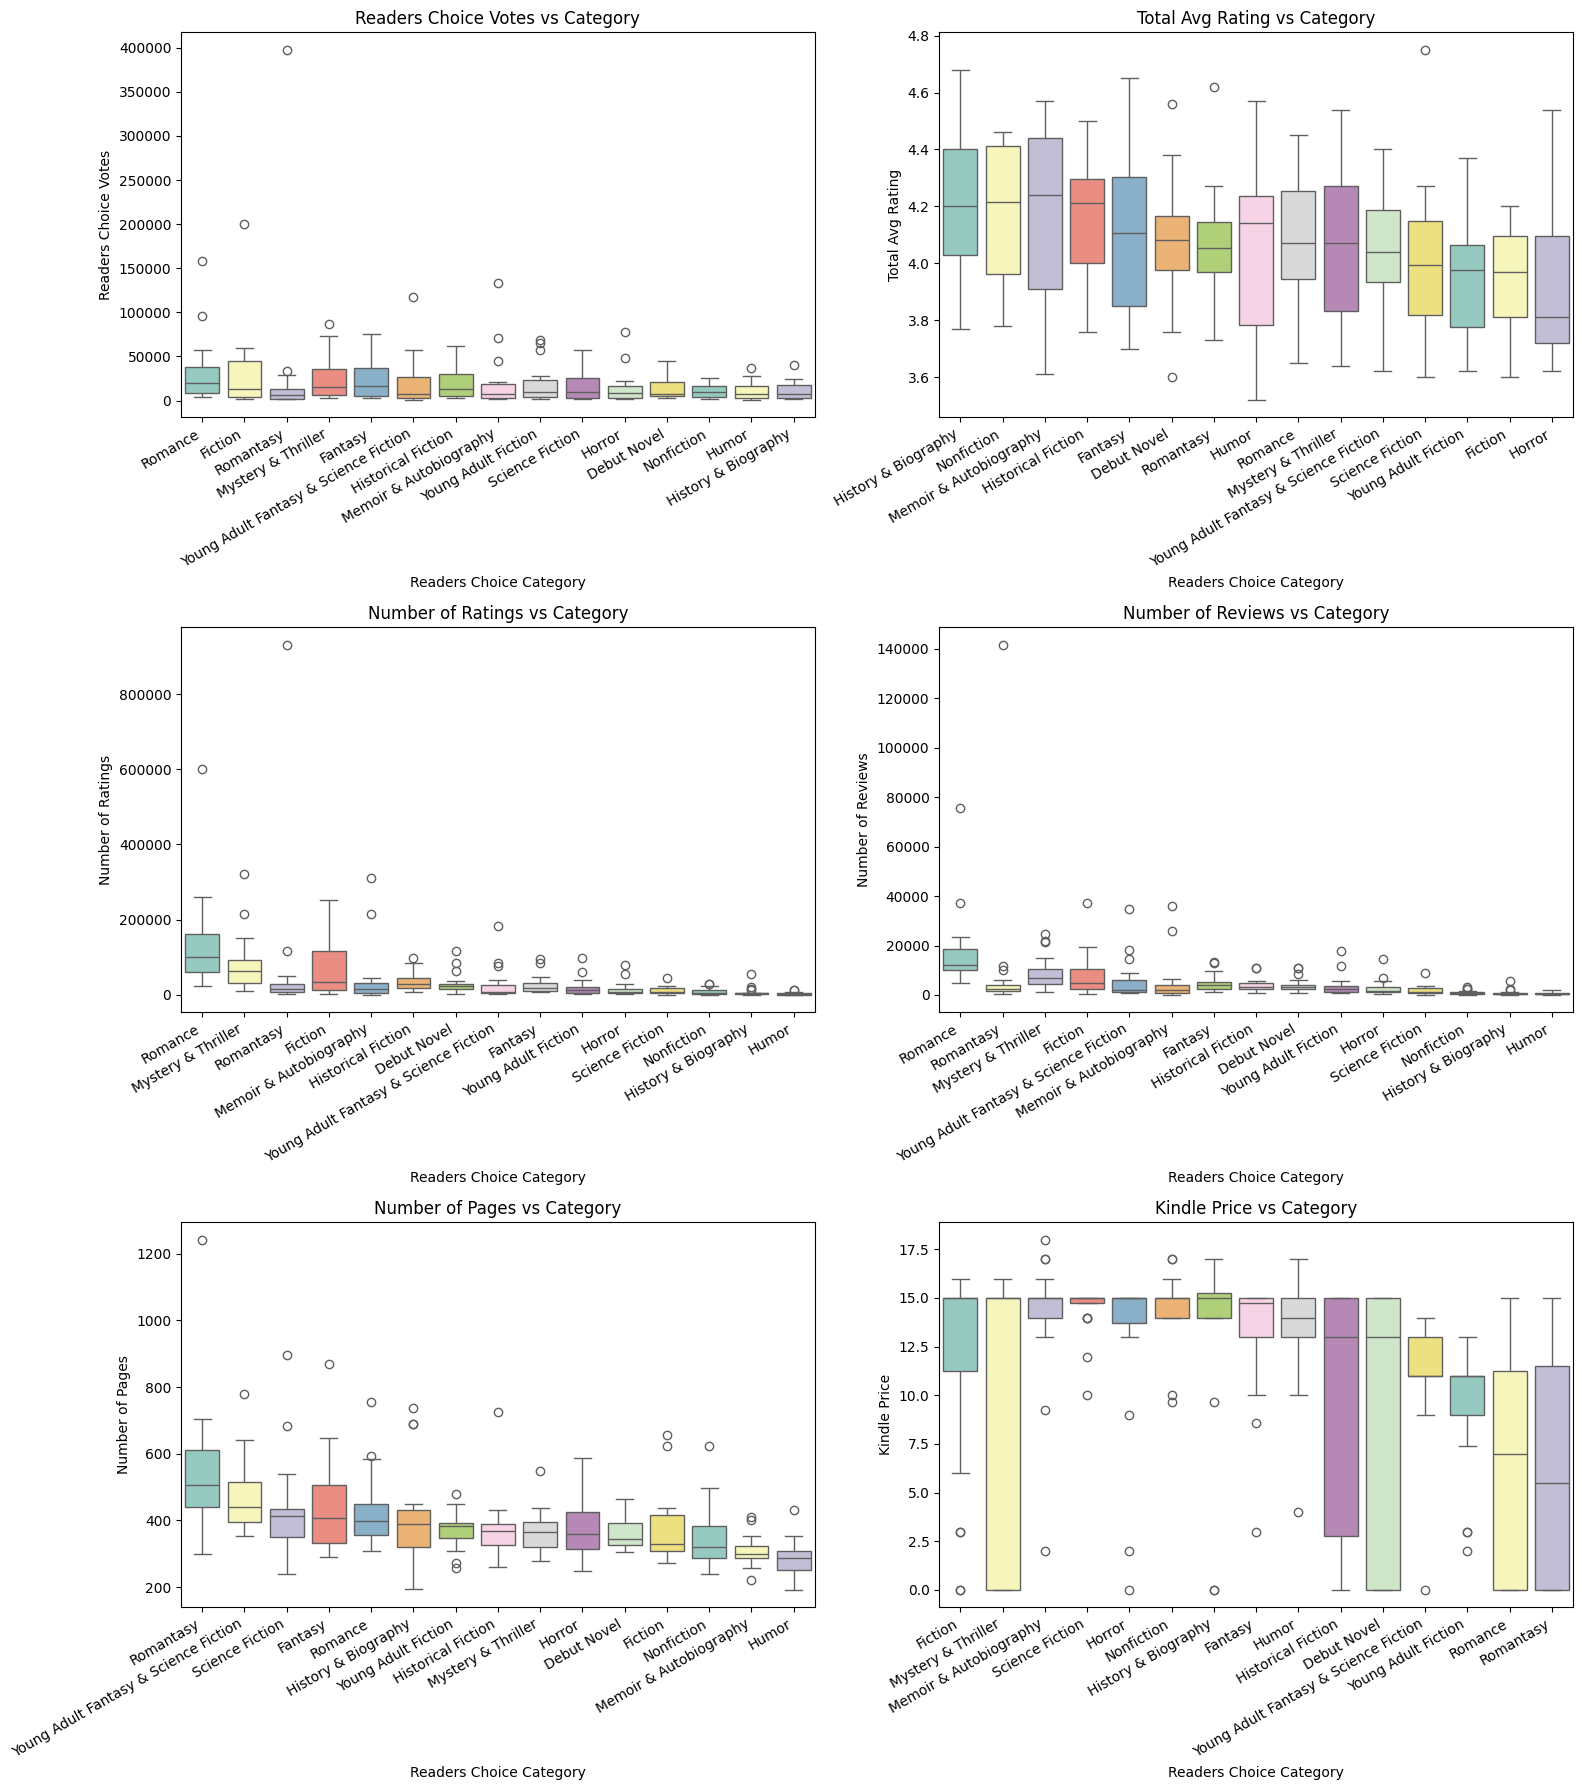

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

layout = {
    'Readers Choice Votes': (0, 0),
    'Total Avg Rating': (0, 1),
    'Number of Ratings': (1, 0),
    'Number of Reviews': (1, 1),
    'Number of Pages': (2, 0),
    'Kindle Price': (2, 1),
}

for column, (i, j) in layout.items():
    ax = axes[i, j]
    cols = category_vote.sort_values(by=column, ascending=False).index
    sns.boxplot(data=df, x='Readers Choice Category', y=column, palette='Set3', ax=ax, order=cols)
    ax.set_title(f'{column} vs Category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
fig.tight_layout()
plt.show()

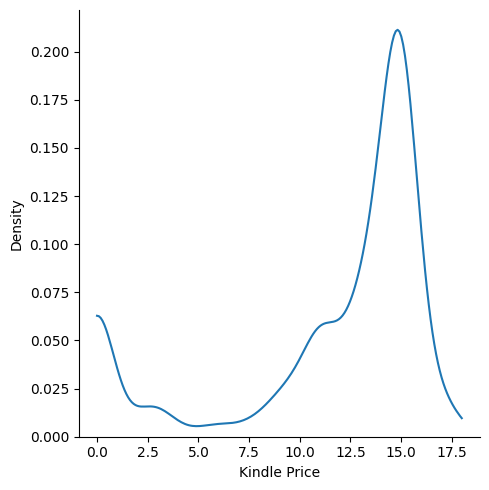

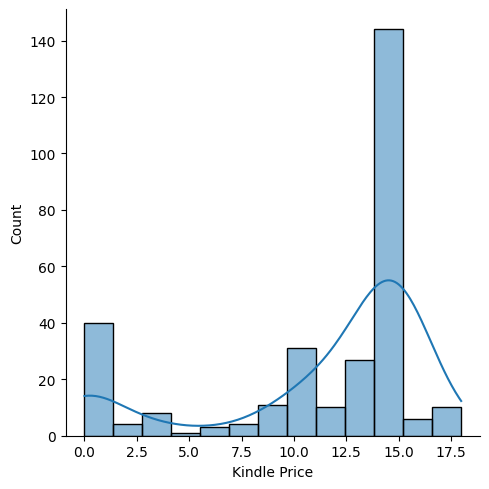

In [14]:
# bw adjust adjusts the bandwidth of the kernel.
# When you set a smaller bw_adjust, you get more contouring, but more noise
# only use small values if you think your distribution is complex
# the "cut" parameter determines how much the curve should extend beyond extreme datapoints
# we set a "0" to not show negative values in the KDE curve
sns.displot(data=df, x='Kindle Price', palette='Set3', kind='kde', bw_adjust=0.5, cut=0)

# for a pure histogram plot
# sns.displot(data=df, x='Kindle Price', palette='Set3')
sns.displot(data=df, x='Kindle Price', palette='Set3', kde=True)

plt.show()

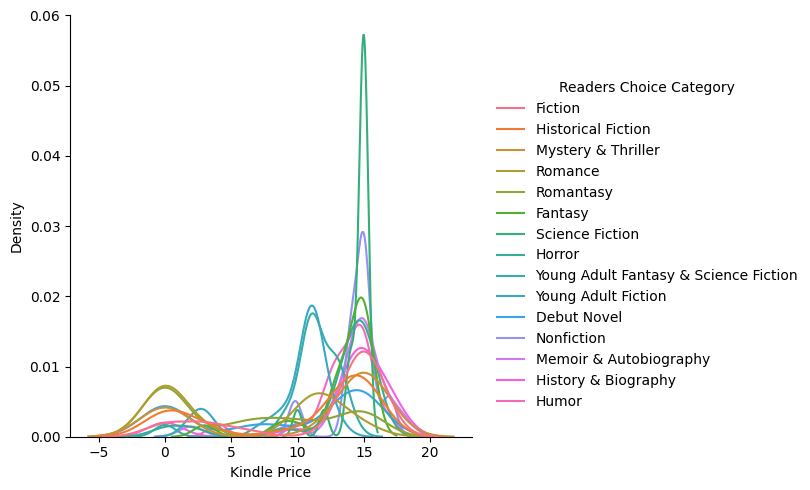

In [15]:
sns.displot(data=df, x='Kindle Price', kind='kde', hue='Readers Choice Category', bw_adjust=0.5)
plt.show()

In [16]:
print('$0 rows', df[df['Kindle Price'] == 0].shape)
df[df['Kindle Price'] == 0].head()

$0 rows (40, 13)


,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
7,21854,Fiction,Maame,Jessica George,4.08,62960,8664,320,Hardcover,31-Jan-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited
8,18050,Fiction,The Collected Regrets of Clover,Mikki Brammer,4.18,37341,5989,320,Hardcover,9-May-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited
20,62211,Historical Fiction,Weyward,Emilia Hart,4.12,83461,11008,329,Hardcover,2-Feb-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited
25,29977,Historical Fiction,The Echo of Old Books,Barbara Davis,4.34,45487,3439,431,Kindle Edition,28-Mar-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited
28,24150,Historical Fiction,Did You Hear About Kitty Karr?,Crystal Smith Paul,3.76,30281,3268,416,Hardcover,2-May-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited


In [17]:
result_df

,Avg Ratings,Number of Ratings,Number of Reviews,Median Pages,Median Kindle Price
Readers Choice Category,,,,,
Romance,4.06,2737676,336747,398.0,6.99
Fiction,3.95,1288841,157445,328.0,14.99
Romantasy,4.07,1387830,203928,506.0,5.49
Mystery & Thriller,4.05,1673792,181312,365.5,14.99
Fantasy,4.10,523942,93625,407.5,14.73
Young Adult Fantasy & Science Fiction,4.04,543467,113098,440.0,10.99
Historical Fiction,4.14,692953,79846,368.0,12.99
Memoir & Autobiography,4.18,814014,99369,298.5,14.99
Young Adult Fiction,3.97,392355,73957,384.0,10.99


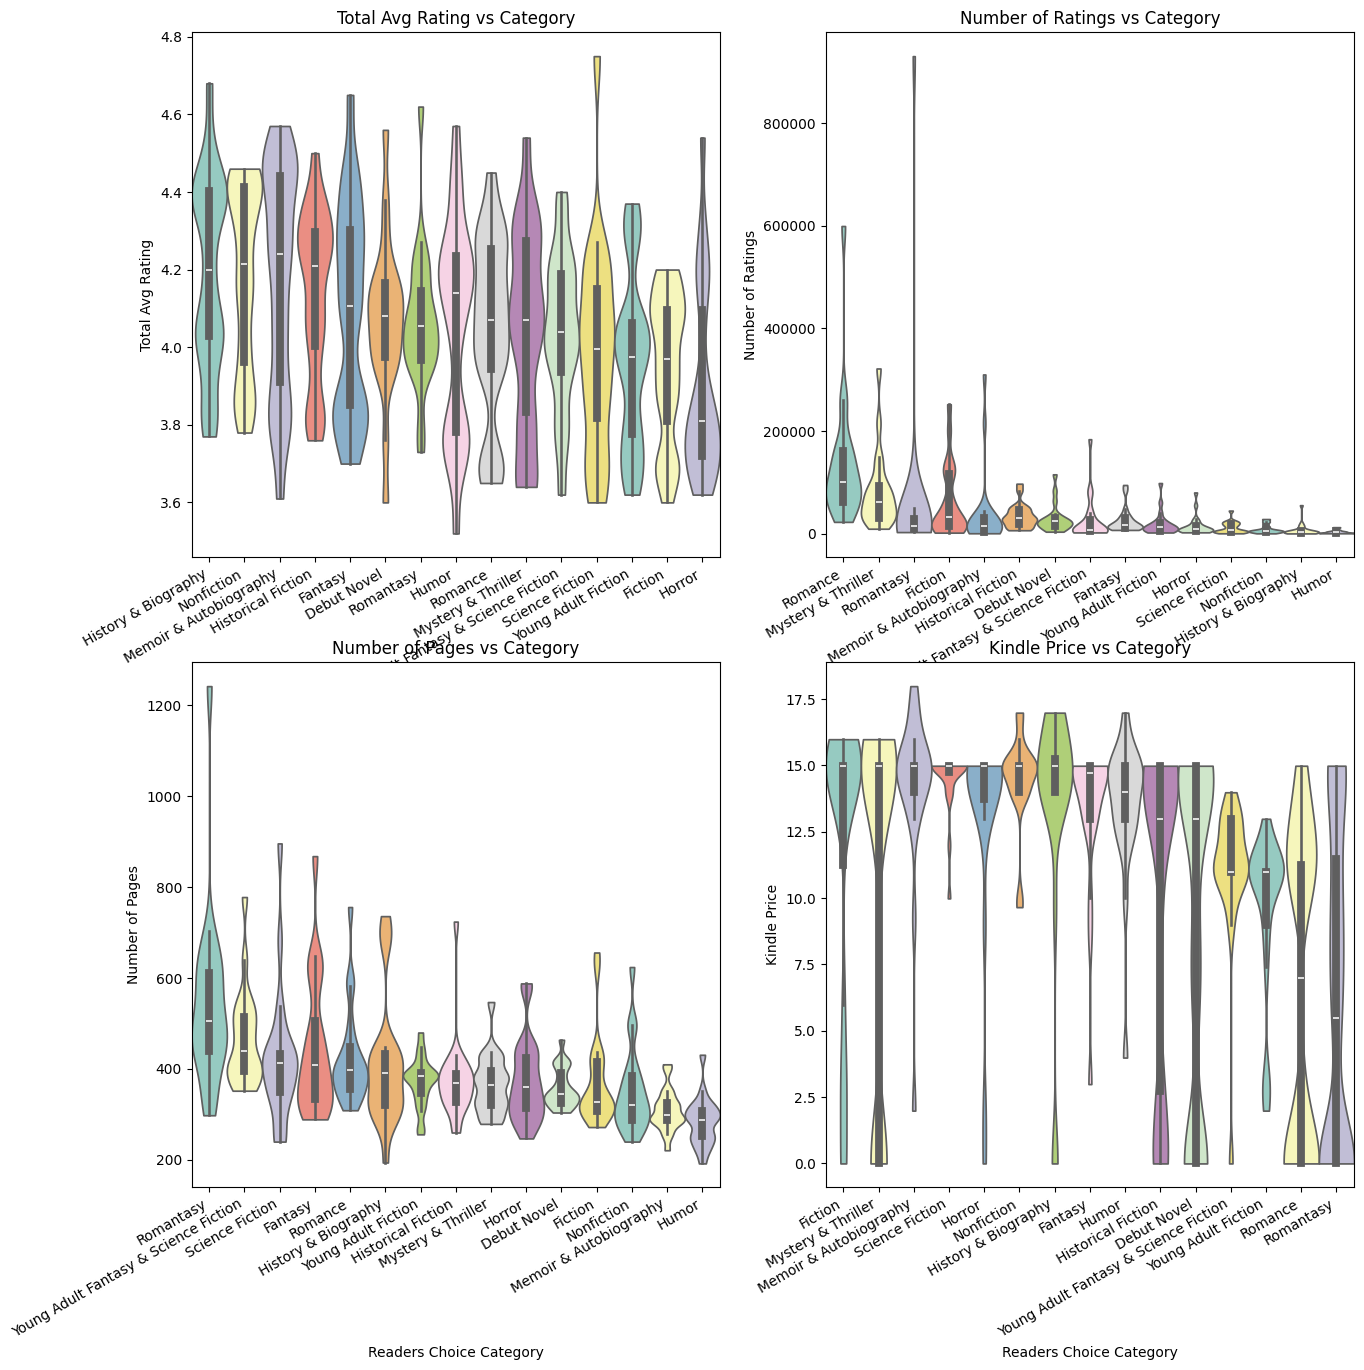

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

layout = {
    'Total Avg Rating': (0, 0),
    'Number of Ratings': (0, 1),
    'Number of Pages': (1, 0),
    'Kindle Price': (1, 1),
}

for column, (i, j) in layout.items():
    ax = axes[i, j]
    cols = category_vote.sort_values(by=column, ascending=False).index
    sns.violinplot(data=df, x='Readers Choice Category', y=column, width=1, ax=ax, palette='Set3', bw_adjust=0.5, cut=0, order=cols)
    ax.set_title(f'{column} vs Category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

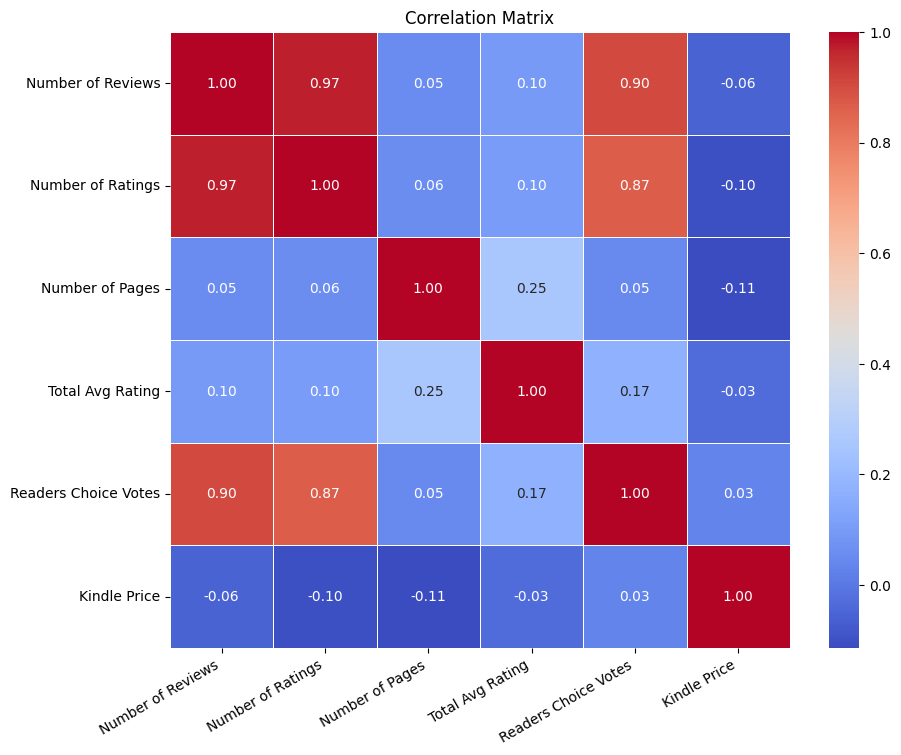

In [19]:
# Assign the columns
columns_of_interest = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Readers Choice Votes', 'Kindle Price']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))

# BrBG is another cool heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

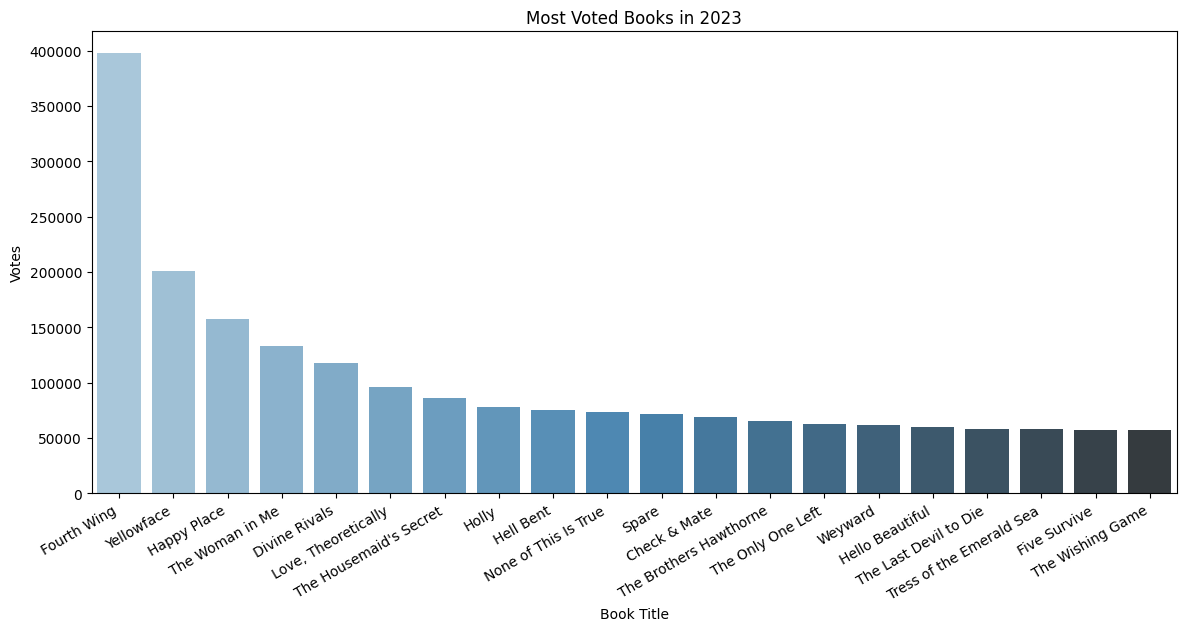

In [20]:
most_voted_books = df.sort_values(by='Readers Choice Votes', ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(most_voted_books, x='Title', y='Readers Choice Votes', palette='Blues_d')
plt.title('Most Voted Books in 2023')
plt.xlabel('Book Title')
plt.ylabel('Votes')
plt.xticks(rotation=30, ha='right')
plt.show()

In [21]:
max_votes_index = df.groupby('Readers Choice Category')['Readers Choice Votes'].idxmax()
titles_with_max_votes = df.loc[max_votes_index, ['Readers Choice Category', 'Title', 'Readers Choice Votes']].sort_values('Readers Choice Votes', ascending=False)
titles_with_max_votes

,Readers Choice Category,Title,Readers Choice Votes
80,Romantasy,Fourth Wing,397565
0,Fiction,Yellowface,200722
60,Romance,Happy Place,157687
239,Memoir & Autobiography,The Woman in Me,132867
160,Young Adult Fantasy & Science Fiction,Divine Rivals,117671
40,Mystery & Thriller,The Housemaid's Secret,86468
140,Horror,Holly,77993
100,Fantasy,Hell Bent,75800
180,Young Adult Fiction,Check & Mate,68736
20,Historical Fiction,Weyward,62211


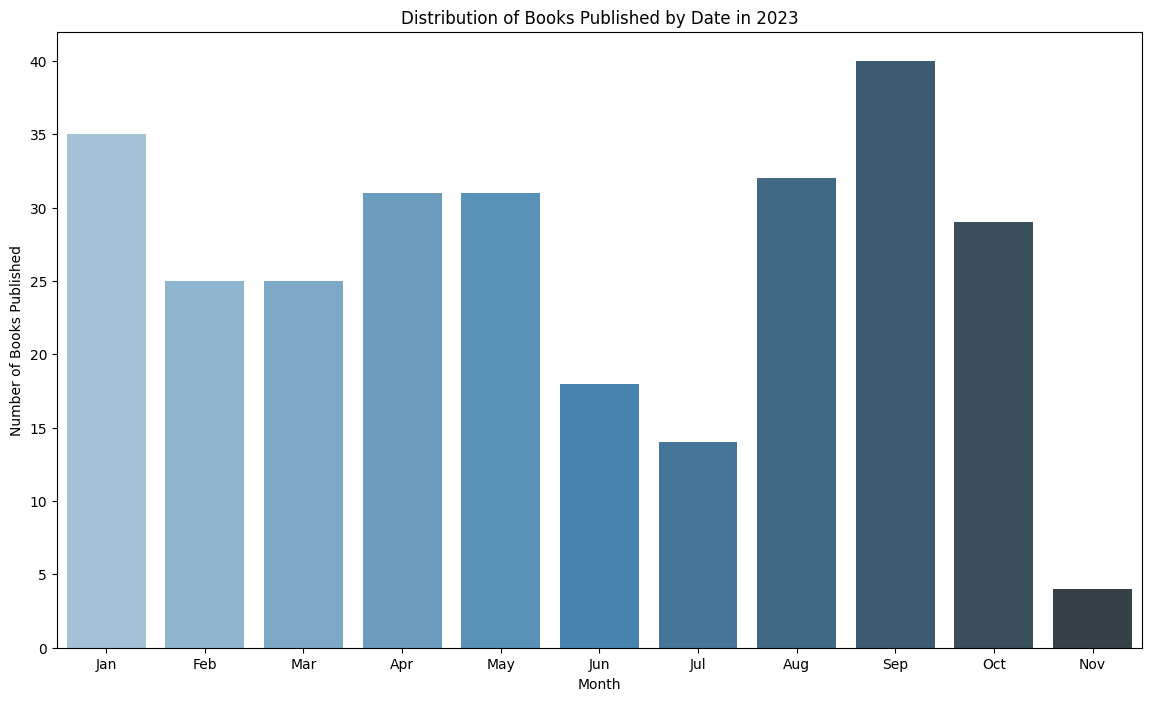

In [22]:
import calendar
df['First Published date'] = pd.to_datetime(df['First Published date'])

#Get only the books from year 2023.
books_2023 = df[df['First Published date'].dt.year == 2023]

#Count how many books released every month
books_per_month = books_2023.groupby(books_2023['First Published date'].dt.month)['Title'].count().reset_index()
books_per_month['Month'] = books_per_month['First Published date'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(14, 8))
sns.barplot(data=books_per_month, x='Month', y='Title', palette='Blues_d')
plt.title('Distribution of Books Published by Date in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Books Published')
plt.show()